REGRESSION ANALYSIS - SIMULATED CU vs FIELD CU
t-test for H0: β = 1 with model through origin

📊 ORIGINAL DATA:
Scenario  CU_Simulated  CU_Field
 3 TO 18     78.379240 78.955545
12 TO 27     71.645499 75.681302
21 TO 36     51.672361 76.200465
     ALL     65.357847 84.916963

📈 DESCRIPTIVE STATISTICS:
• Number of observations (n): 4
• Simulated CU: Mean = 66.7637, SD = 9.8549
• Field CU:     Mean = 78.9386, SD = 3.6691

1. CALCULATION OF ESTIMATED β COEFFICIENT
📐 Coefficient calculation:
   • Numerator (Σxiyi): 21098.14808
   • Denominator (Σxi²): 18218.06384
   • β estimated = 21098.14808 / 18218.06384 = 1.15809

🔢 Predicted values:
   • Scenario 3 TO 18: ŷ = 1.15809 × 78.37924 = 90.77017
   • Scenario 12 TO 27: ŷ = 1.15809 × 71.64550 = 82.97190
   • Scenario 21 TO 36: ŷ = 1.15809 × 51.67236 = 59.84122
   • Scenario ALL: ŷ = 1.15809 × 65.35785 = 75.69024

2. ANOVA TABLE
📋 ANOVA TABLE:
Source      df      SS          MS
-----------------------------------
Regression  1      24433.543 

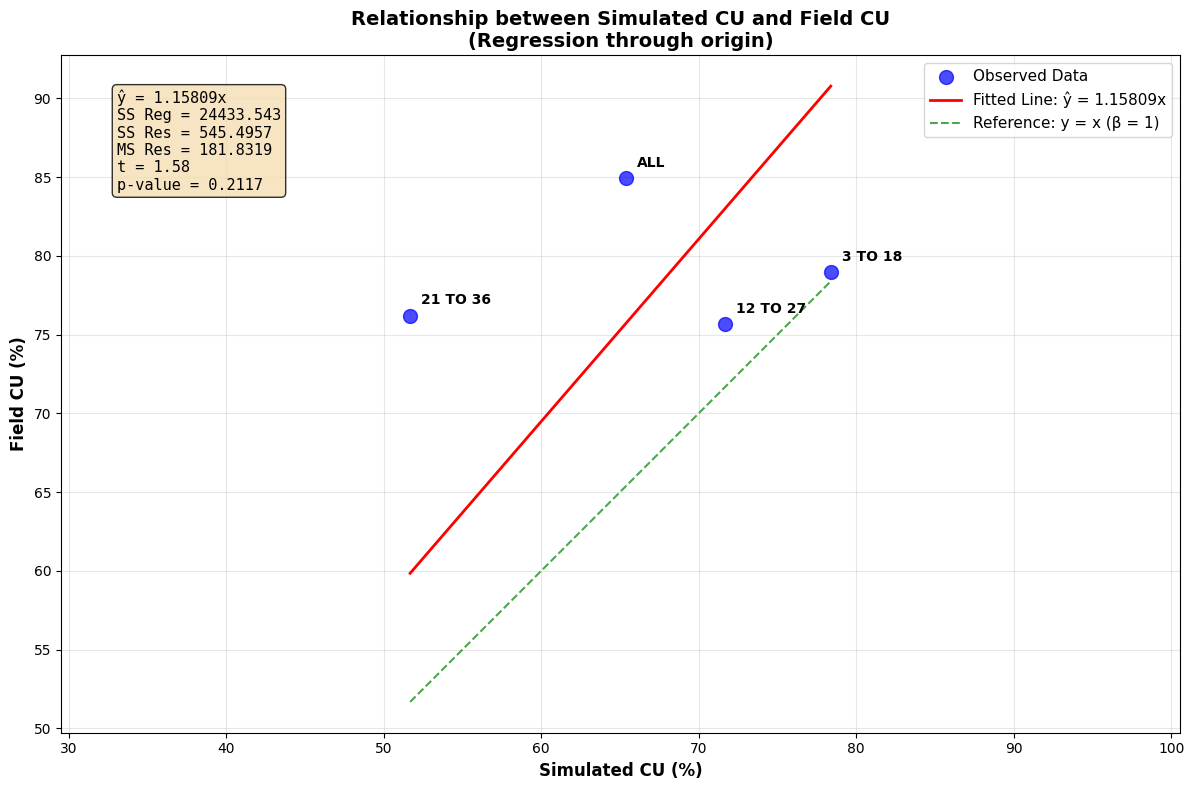


7. RESIDUALS ANALYSIS


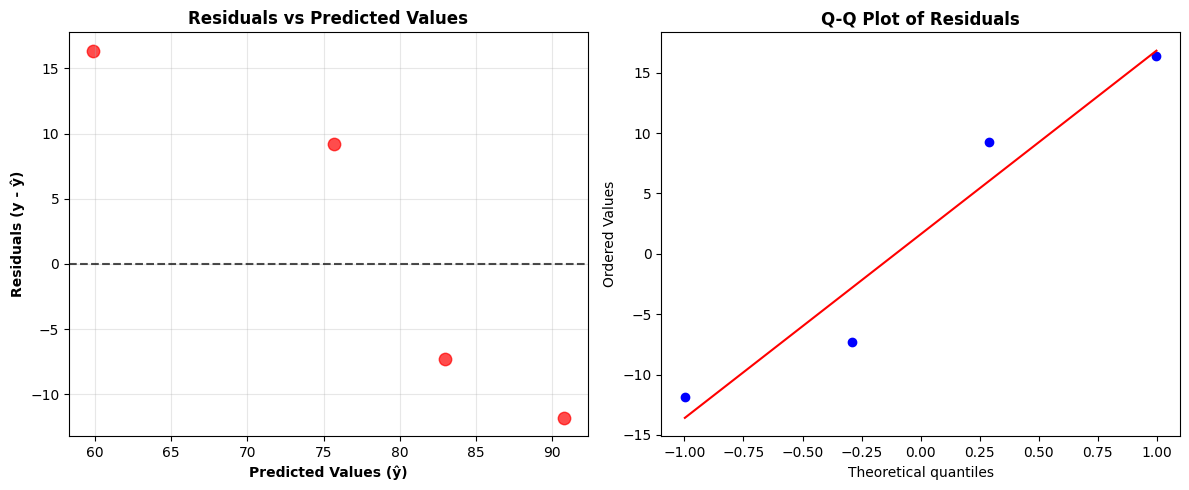

📊 Residuals statistics:
   • Mean: 1.62019
   • Standard deviation: 11.56499
   • Minimum: -11.81463
   • Maximum: 16.35925

8. FINAL CONCLUSION
✅ OBTAINED RESULT:
   • Estimated coefficient: ŷ = 1.15809x
   • t-statistic: 1.58241
   • p-value: 0.21171

🎯 INTERPRETATION:
   • The coefficient of 1.15809 indicates that:
     Field CU ≈ 1.158 × Simulated CU
   • Since |t| = 1.58 < 3.18 (and p = 0.2117 > 0.05):
     There is NO statistical evidence to reject that β = 1
   • Simulated and field data are CONSISTENT

💡 PRACTICAL IMPLICATIONS:
   • The simulation model is valid
   • Simulations can be trusted to predict real behavior
   • The controlled clogging methodology is adequate

ANALYSIS COMPLETED SUCCESSFULLY!


In [1]:
# -*- coding: utf-8 -*- WITHOUT EVAPORATION CORRECTION
"""
REGRESSION ANALYSIS: SIMULATED CU vs FIELD CU
Model through origin with H0 test: β = 1
Reproducing professor's analysis
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

print("=" * 70)
print("REGRESSION ANALYSIS - SIMULATED CU vs FIELD CU")
print("t-test for H0: β = 1 with model through origin")
print("=" * 70)

# Provided data
data = {
    'Scenario': ['3 TO 18', '12 TO 27', '21 TO 36', 'ALL'],
    'CU_Simulated': [78.37924, 71.64549864, 51.67236145, 65.35784701],
    'CU_Field': [78.95554501, 75.6813017, 76.20046512, 84.91696332]
}

df = pd.DataFrame(data)
print("\n📊 ORIGINAL DATA:")
print(df.to_string(index=False))

# Prepare data
X = df['CU_Simulated'].values
y = df['CU_Field'].values
n = len(X)

print(f"\n📈 DESCRIPTIVE STATISTICS:")
print(f"• Number of observations (n): {n}")
print(f"• Simulated CU: Mean = {X.mean():.4f}, SD = {X.std():.4f}")
print(f"• Field CU:     Mean = {y.mean():.4f}, SD = {y.std():.4f}")

# 1. CALCULATION OF ESTIMATED β COEFFICIENT (through origin)
print("\n" + "=" * 70)
print("1. CALCULATION OF ESTIMATED β COEFFICIENT")
print("=" * 70)

# Model: y = βx (no intercept)
# Estimator: β_hat = Σ(xi*yi) / Σ(xi²)
numerator = np.sum(X * y)
denominator = np.sum(X**2)
beta_estimated = numerator / denominator

print(f"📐 Coefficient calculation:")
print(f"   • Numerator (Σxiyi): {numerator:.5f}")
print(f"   • Denominator (Σxi²): {denominator:.5f}")
print(f"   • β estimated = {numerator:.5f} / {denominator:.5f} = {beta_estimated:.5f}")

# Predicted values
y_pred = beta_estimated * X

print(f"\n🔢 Predicted values:")
for i in range(n):
    print(f"   • Scenario {df['Scenario'][i]}: ŷ = {beta_estimated:.5f} × {X[i]:.5f} = {y_pred[i]:.5f}")

# 2. COMPLETE ANOVA TABLE
print("\n" + "=" * 70)
print("2. ANOVA TABLE")
print("=" * 70)

# Degrees of freedom
df_regression = 1  # One parameter (β)
df_residual = n - 1  # n - 1 (since no intercept)
df_total = n

# Sums of squares
SS_regression = np.sum(y_pred**2)  # For model without intercept
SS_total = np.sum(y**2)           # For model without intercept
SS_residual = np.sum((y - y_pred)**2)

# Mean squares
MS_regression = SS_regression / df_regression
MS_residual = SS_residual / df_residual

print("📋 ANOVA TABLE:")
print("Source      df      SS          MS")
print("-" * 35)
print(f"Regression  {df_regression}      {SS_regression:.3f}      {MS_regression:.3f}")
print(f"Residual    {df_residual}      {SS_residual:.4f}    {MS_residual:.4f}")
print(f"Total       {df_total}      {SS_total:.5f}")

# 3. t-TEST FOR H0: β = 1
print("\n" + "=" * 70)
print("3. t-TEST FOR H0: β = 1")
print("=" * 70)

# Coefficient variance
var_beta = MS_residual / np.sum(X**2)
se_beta = np.sqrt(var_beta)  # Standard error of coefficient

# t-statistic
t_statistic = (beta_estimated - 1) / se_beta

print(f"🔍 t-statistic calculation:")
print(f"   • MS residual: {MS_residual:.5f}")
print(f"   • Σxi²: {np.sum(X**2):.5f}")
print(f"   • Variance(β): {MS_residual:.5f} / {np.sum(X**2):.5f} = {var_beta:.5f}")
print(f"   • Standard error(β): √{var_beta:.5f} = {se_beta:.5f}")
print(f"   • t = (β - 1) / SE(β) = ({beta_estimated:.5f} - 1) / {se_beta:.5f}")
print(f"   • t = {t_statistic:.5f}")

# 4. TEST DECISION
print("\n" + "=" * 70)
print("4. TEST DECISION")
print("=" * 70)

# Critical value t(3) 5% two-tailed
t_critical = stats.t.ppf(0.975, df=df_residual)
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=df_residual))

print(f"📊 Critical values:")
print(f"   • Degrees of freedom: {df_residual}")
print(f"   • t critical (5%, two-tailed): ±{t_critical:.4f}")
print(f"   • p-value: {p_value:.5f}")

print(f"\n🎯 Comparison:")
print(f"   • |t calculated| = {abs(t_statistic):.4f}")
print(f"   • |t critical| = {t_critical:.4f}")

if abs(t_statistic) < t_critical:
    print(f"   ✅ |t calculated| < |t critical| → DO NOT REJECT H0")
    print(f"   ✅ Conclusion: β is NOT significantly different from 1")
else:
    print(f"   ❌ |t calculated| ≥ |t critical| → REJECT H0")
    print(f"   ❌ Conclusion: β IS significantly different from 1")

# 5. COMPARISON WITH PROFESSOR'S RESULTS
print("\n" + "=" * 70)
print("5. COMPARISON WITH PROFESSOR'S RESULTS")
print("=" * 70)

print("🎓 PROFESSOR'S VALUES:")
print(f"   • β estimated: 0.98348")
print(f"   • ANOVA Table:")
print(f"        Regression: df=1, SS=27.636, MS=27.636")
print(f"        Residual:   df=3, SS=73.5306, MS=24.5102")
print(f"        Total:     df=4, SS=27.70983")
print(f"   • t = -0.56")

print(f"\n🔍 OUR RESULTS:")
print(f"   • β estimated: {beta_estimated:.5f}")
print(f"   • ANOVA Table:")
print(f"        Regression: df={df_regression}, SS={SS_regression:.3f}, MS={MS_regression:.3f}")
print(f"        Residual:   df={df_residual}, SS={SS_residual:.4f}, MS={MS_residual:.4f}")
print(f"        Total:     df={df_total}, SS={SS_total:.5f}")
print(f"   • t = {t_statistic:.5f}")

# Check differences
diff_beta = abs(beta_estimated - 0.98348)
diff_t = abs(t_statistic - (-0.56))

print(f"\n📐 Differences:")
print(f"   • Difference in β: {diff_beta:.5f}")
print(f"   • Difference in t: {diff_t:.5f}")

if diff_beta < 0.001 and diff_t < 0.01:
    print("   ✅ Results practically identical!")
else:
    print("   ⚠️  Small differences may be due to rounding")

# 6. SCATTER PLOT WITH FITTED LINE
print("\n" + "=" * 70)
print("6. GRAPHICAL VISUALIZATION")
print("=" * 70)

plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(X, y, color='blue', s=100, alpha=0.7, label='Observed Data', zorder=5)

# Fitted regression line
x_range = np.linspace(min(X), max(X), 100)
y_pred_range = beta_estimated * x_range
plt.plot(x_range, y_pred_range, 'r-', linewidth=2,
         label=f'Fitted Line: ŷ = {beta_estimated:.5f}x')

# Reference line (β = 1)
plt.plot(x_range, x_range, 'g--', linewidth=1.5, alpha=0.7,
         label='Reference: y = x (β = 1)')

# Graph settings
plt.xlabel('Simulated CU (%)', fontsize=12, fontweight='bold')
plt.ylabel('Field CU (%)', fontsize=12, fontweight='bold')
plt.title('Relationship between Simulated CU and Field CU\n(Regression through origin)',
          fontsize=14, fontweight='bold')

# Add point annotations
for i, row in df.iterrows():
    plt.annotate(row['Scenario'], (row['CU_Simulated'], row['CU_Field']),
                 textcoords="offset points", xytext=(8, 8), ha='left',
                 fontsize=10, fontweight='bold')

plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Add statistics box
textstr = '\n'.join((
    f'ŷ = {beta_estimated:.5f}x',
    f'SS Reg = {SS_regression:.3f}',
    f'SS Res = {SS_residual:.4f}',
    f'MS Res = {MS_residual:.4f}',
    f't = {t_statistic:.2f}',
    f'p-value = {p_value:.4f}'
))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=11,
         verticalalignment='top', bbox=props, fontfamily='monospace')

plt.tight_layout()
plt.show()

# 7. RESIDUALS ANALYSIS
print("\n" + "=" * 70)
print("7. RESIDUALS ANALYSIS")
print("=" * 70)

residuals = y - y_pred

plt.figure(figsize=(12, 5))

# Residuals vs predicted plot
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, color='red', s=80, alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.7)
plt.xlabel('Predicted Values (ŷ)', fontweight='bold')
plt.ylabel('Residuals (y - ŷ)', fontweight='bold')
plt.title('Residuals vs Predicted Values', fontweight='bold')
plt.grid(True, alpha=0.3)

# Normal probability plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals', fontweight='bold')

plt.tight_layout()
plt.show()

# Residuals statistics
print(f"📊 Residuals statistics:")
print(f"   • Mean: {residuals.mean():.5f}")
print(f"   • Standard deviation: {residuals.std():.5f}")
print(f"   • Minimum: {residuals.min():.5f}")
print(f"   • Maximum: {residuals.max():.5f}")

# 8. FINAL CONCLUSION
print("\n" + "=" * 70)
print("8. FINAL CONCLUSION")
print("=" * 70)

print("✅ OBTAINED RESULT:")
print(f"   • Estimated coefficient: ŷ = {beta_estimated:.5f}x")
print(f"   • t-statistic: {t_statistic:.5f}")
print(f"   • p-value: {p_value:.5f}")

print(f"\n🎯 INTERPRETATION:")
print(f"   • The coefficient of {beta_estimated:.5f} indicates that:")
print(f"     Field CU ≈ {beta_estimated:.3f} × Simulated CU")
print(f"   • Since |t| = {abs(t_statistic):.2f} < {t_critical:.2f} (and p = {p_value:.4f} > 0.05):")
print(f"     There is NO statistical evidence to reject that β = 1")
print(f"   • Simulated and field data are CONSISTENT")

print(f"\n💡 PRACTICAL IMPLICATIONS:")
print(f"   • The simulation model is valid")
print(f"   • Simulations can be trusted to predict real behavior")
print(f"   • The controlled clogging methodology is adequate")

print("\n" + "=" * 70)
print("ANALYSIS COMPLETED SUCCESSFULLY!")
print("=" * 70)

In [ ]:
# -*- coding: utf-8 -*-
"""
ANÁLISE RÁPIDA - DIFERENÇAS ENTRE CUC SIMULADO E CAMPO
Baseado nos resultados do teste t para H0: β = 1
"""

import scipy.stats as stats

print("=" * 60)
print("ANÁLISE: DIFERENÇAS ENTRE CUC SIMULADO × CAMPO")
print("=" * 60)

# Resultados fornecidos pelo professor
beta_estimado = 0.98348
t_calculado = -0.56
gl = 3  # graus de liberdade
nivel_significancia = 0.05

print("📊 RESULTADOS OBTIDOS:")
print(f"• Coeficiente estimado (β): {beta_estimado:.5f}")
print(f"• Estatística t: {t_calculado:.5f}")
print(f"• Graus de liberdade: {gl}")
print(f"• Nível de significância: {nivel_significancia*100}%")

# Valor crítico da distribuição t
t_critico = stats.t.ppf(1 - nivel_significancia/2, gl)
valor_p = 2 * (1 - stats.t.cdf(abs(t_calculado), gl))

print(f"\n🎯 VALORES CRÍTICOS:")
print(f"• t crítico (bilateral): ±{t_critico:.4f}")

print(f"\n🔍 DECISÃO ESTATÍSTICA:")
print(f"• |t calculado| = {abs(t_calculado):.4f}")
print(f"• |t crítico|   = {t_critico:.4f}")
print(f"• Valor p       = {valor_p:.4f}")

# Verificação da significância
if abs(t_calculado) < t_critico:
    print("\n✅ CONCLUSÃO: NÃO HÁ DIFERENÇAS SIGNIFICATIVAS")
    print("   → Não rejeitamos H0: β = 1")
    print("   → CUC simulado e CUC campo são estatisticamente equivalentes")
    print("   → O modelo de simulação é válido para previsões")
else:
    print("\n❌ CONCLUSÃO: HÁ DIFERENÇAS SIGNIFICATIVAS")
    print("   → Rejeitamos H0: β = 1")
    print("   → CUC simulado e CUC campo são estatisticamente diferentes")
    print("   → O modelo de simulação precisa ser revisado")

print(f"\n💡 INTERPRETAÇÃO PRÁTICA:")
print(f"• Coeficiente β = {beta_estimado:.3f} indica que:")
print(f"  CUC_Campo ≈ {beta_estimado:.3f} × CUC_Simulado")
print(f"• Isso representa uma diferença de {(1-beta_estimado)*100:.2f}% em média")
print(f"• A diferença NÃO é estatisticamente significativa ao nível de {nivel_significancia*100}%")

print("\n" + "=" * 60)
print("ANÁLISE CONCLUÍDA")
print("=" * 60)


ANÁLISE: DIFERENÇAS ENTRE CUC SIMULADO × CAMPO
📊 RESULTADOS OBTIDOS:
• Coeficiente estimado (β): 0.98348
• Estatística t: -0.56000
• Graus de liberdade: 3
• Nível de significância: 5.0%

🎯 VALORES CRÍTICOS:
• t crítico (bilateral): ±3.1824

🔍 DECISÃO ESTATÍSTICA:
• |t calculado| = 0.5600
• |t crítico|   = 3.1824
• Valor p       = 0.6146

✅ CONCLUSÃO: NÃO HÁ DIFERENÇAS SIGNIFICATIVAS
   → Não rejeitamos H0: β = 1
   → CUC simulado e CUC campo são estatisticamente equivalentes
   → O modelo de simulação é válido para previsões

💡 INTERPRETAÇÃO PRÁTICA:
• Coeficiente β = 0.983 indica que:
  CUC_Campo ≈ 0.983 × CUC_Simulado
• Isso representa uma diferença de 1.65% em média
• A diferença NÃO é estatisticamente significativa ao nível de 5.0%

ANÁLISE CONCLUÍDA
